In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_P11_P14_P28_PHLYUM.csv'
data_df = pd.read_csv(file_path)

# Identify columns associated with different DOLs and update the mapping to match your data columns
dol_mapping = {
    'P11': ['073B', '075B', '081B', '083B', '085B', '088B', '097B', '105B', '106B', '107B'],
    'P14': ['140B', '146B', '151B', '156B', '158B', '161B', '162B', '167B', '258B', '259B', '260B', '261B'],
    'P28': ['111B', '115B', '119B', '120B', '124B', '129B', '134B', '135B']
}
# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

data_df


,073B,075B,081B,083B,085B,088B,097B,105B,106B,107B,...,167B,215B,226B,227B,228B,235B,258B,259B,260B,261B
class,,,,,,,,,,,,,,,,,,,,,
Actinobacteria,0,0,1,0,0,0,0,0,2,0,...,0,47,70,25,20,34,29,0,5,0
Bacteroidetes,10,1,5,3,0,12,1,2,20,14,...,1,310,242,152,97,286,458,67,130,80
Epsilonbacteraeota,0,0,0,3,0,0,0,2,0,0,...,0,38,26,26,5,27,30,5,3,0
Euglenozoa,5,4,4,6,3,5,0,2,49,5,...,4,0,0,0,1,2,3,0,1,0
Firmicutes,1732,1884,1616,1189,1686,2133,1628,2027,970,2109,...,2357,1212,1037,912,1341,1233,1290,2110,1974,2167
Fusobacteria,0,0,0,1,0,0,1,0,0,0,...,1,24,7,12,7,13,9,2,1,11
Patescibacteria,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,6,0,0,0
Proteobacteria,641,499,762,1186,699,238,758,355,1339,260,...,25,711,975,1216,905,763,510,203,266,125
Spirochaetes,0,0,0,0,0,0,0,0,0,0,...,0,17,18,27,8,21,38,1,5,5


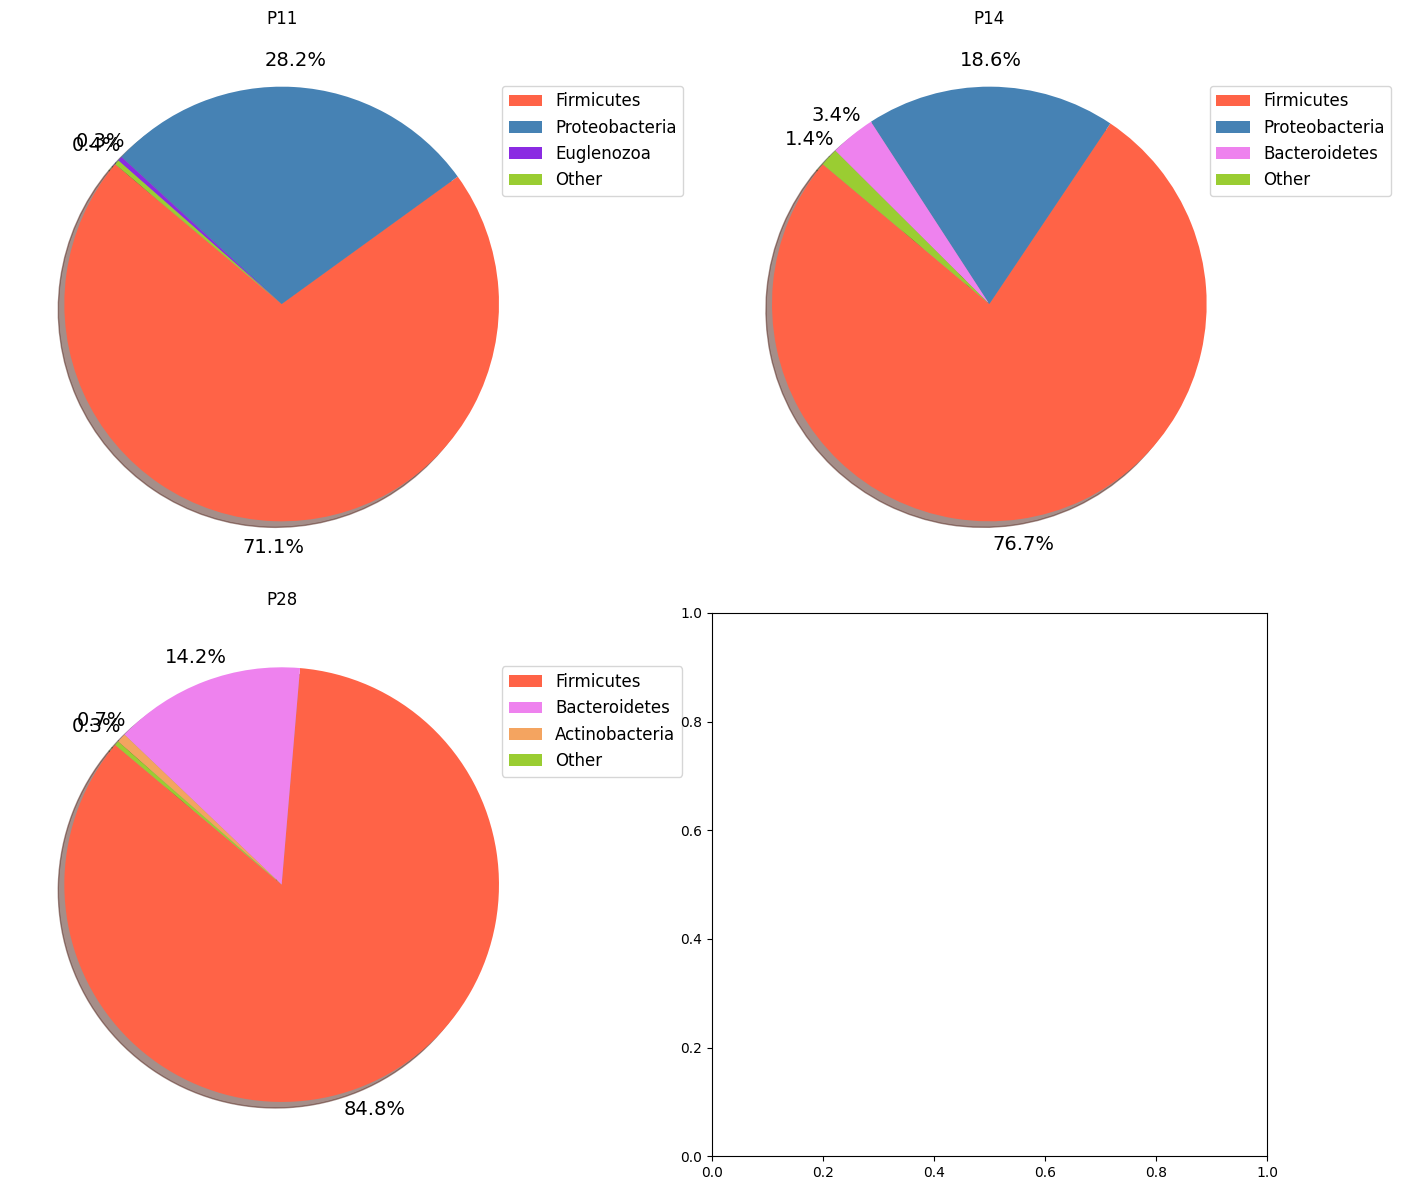

In [27]:
# Define color mapping
color_mapping = {
    'Firmicutes': '#FF6347',
    'Proteobacteria': '#4682B4',
    'Bacteroidetes': '#EE82EE',
    'Actinobacteria': '#F4A460',
    'Euglenozoa': '#8A2BE2',
    'Other': '#9ACD32'
}
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.12, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.89, 0.3, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_P11_P14_P28_GENUS.csv'
data_df = pd.read_csv(file_path)

# Identify columns associated with different DOLs and map them
dol_mapping = {
    'P11': ['073B', '075B', '081B', '083B', '085B', '088B', '097B', '105B', '106B', '107B'],
    'P14': ['140B', '146B', '151B', '156B', '158B', '161B', '162B', '167B', '258B', '259B', '260B', '261B'],
    'P28': ['111B', '115B', '119B', '120B', '124B', '129B', '134B', '135B']
}

# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

data_df

,073B,075B,081B,083B,085B,088B,097B,105B,106B,107B,...,167B,215B,226B,227B,228B,235B,258B,259B,260B,261B
class,,,,,,,,,,,,,,,,,,,,,
Acetobacter,0,0,0,0,0,0,0,0,0,0,...,0,26,10,14,11,33,24,4,1,2
Acholeplasma,0,0,0,0,0,0,0,0,8,0,...,0,9,9,6,4,5,4,0,0,0
Acinetobacter,1,0,0,0,0,1,0,2,0,0,...,0,99,44,43,23,35,49,5,5,0
Aerococcus,0,0,0,0,0,0,0,0,0,0,...,0,3,2,4,4,13,4,0,0,0
Akkermansia,0,0,0,0,0,0,0,0,0,0,...,0,17,4,12,0,4,11,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veillonella,0,0,2,0,0,0,0,0,8,6,...,2,0,1,0,0,0,1,0,0,0
Vibrio,0,0,0,0,0,0,0,0,0,0,...,0,14,12,3,2,14,6,1,3,0
Weissella,0,1,1,0,0,2,0,2,0,0,...,0,59,47,27,20,73,43,12,5,0


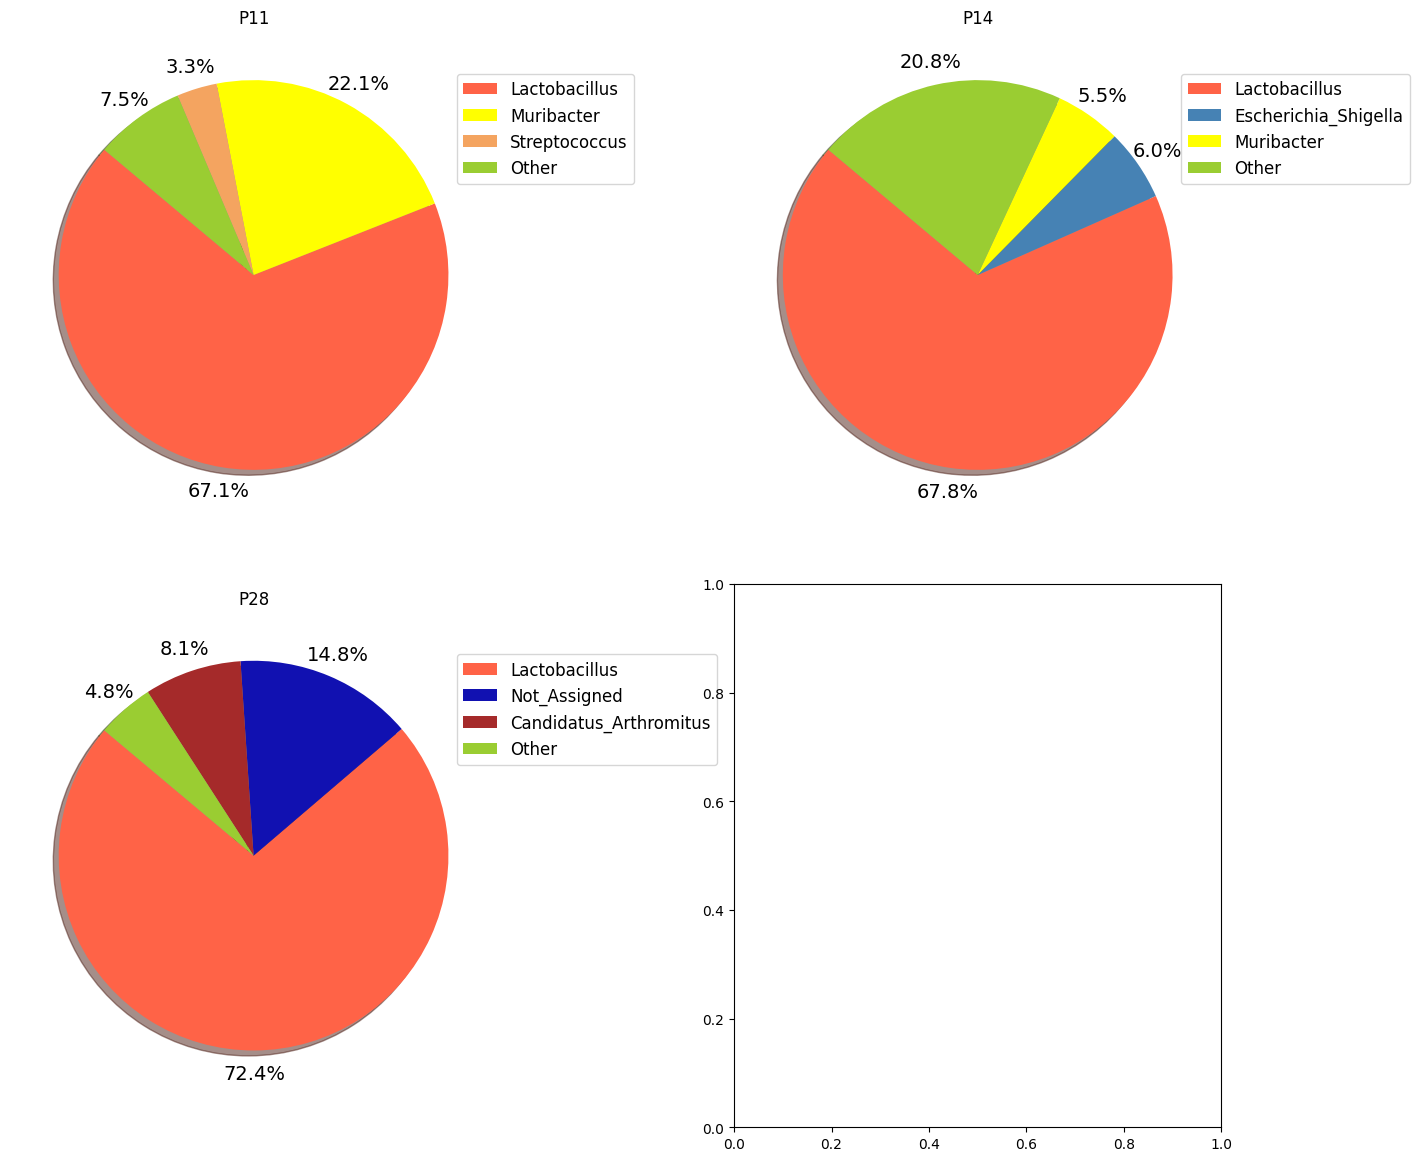

In [30]:
'''
colors = []
for tax in top_five_taxa:
    if tax == 'Lactobacillus':
        colors.append('#FF6347')
    elif tax == 'Escherichia_Shigella':
        colors.append('#4682B4')
    elif tax == 'Not_Assigned':
        colors.append('#FFE4C4')
    elif tax == 'Muribacter':
        colors.append('#F4A460')
    else:
        colors.append('#9ACD32')
'''

# Define color mapping
color_mapping = {
    'Lactobacillus': '#FF6347',
    'Escherichia_Shigella': '#4682B4',
    'Not_Assigned': '#1111B1',
    'Bacteroides': '#EE82EE',
    'Streptococcus': '#F4A460',
    'Muribacter': '#FFFF00',
    'Lachnospiraceae_NK4A136_group': '#8A2BE2',
    'Candidatus_Arthromitus':'#A52A2A',
    'Other': '#9ACD32'
}
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=1.12, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.90, 0.3, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()